In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [ ]:
def read_csv_by_dir(path, index_col=None):
    df_raw = pd.DataFrame()
    for files in os.listdir(path):
        if files.endswith('.csv'):
            df = pd.read_csv('/'.join([path,files]),
                            index_col=index_col)
        df_raw = pd.concat((df_raw,df),axis=0)
    return df_raw

In [ ]:
data_path="C:/Users/smhrd/Desktop/dacon/water_level_prediction/competition_data"

df_rf = read_csv_by_dir('/'.join([data_path,'rf_data']), index_col=0)
df_water = read_csv_by_dir('/'.join([data_path,'water_data']), index_col=0)
submission = pd.read_csv('/'.join([data_path,'sample_submission.csv']), index_col=0)

In [ ]:
df_water.drop('fw_1018680', axis=1, inplace=True)
df_water = df_water.iloc[:-len(submission), :]
water_cols = df_water.drop(submission.columns, axis=1)

In [ ]:
submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_data = pd.read_csv('water_data/data_2021.csv', index_col=0)
sample_data = sample_data.replace(" ", np.nan)
sample_data = sample_data.fillna(0)
sample = sample_data.drop(submission.columns, axis=1)
sample.drop('fw_1018680', axis=1, inplace=True)
rf_data = pd.read_csv('rf_data/rf_2021.csv', index_col=0)
rf_data = rf_data.replace(" ", np.nan)
rf_data = rf_data.fillna(0)
sample_data  =pd.concat([rf_data, sample_data], axis=1)

In [ ]:
def plotter(column_list, target_col, df):
    """Plots scatterplot for each independent variable against the target variable
    
    Args-
        column_list- List containing names of all the dependent variables
        target_col- Name of the target variable
        df- The dataframe
    Returns-
        None
    """
    len_col = len(column_list) #length of list of all the dependent variables
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'yellow', 'lime'] #list of color values
    fig, axes = plt.subplots(len_col, figsize = (4, 4 * len_col)) #Creating a plot with subplots for each independant variable
    i = 0
    for col, ax in zip(column_list, axes): #The for loop goes through zipped list of column names and subplot and plots each plot
        ax.scatter(df[col], df[target_col], alpha = 0.3, c = color[i], s=1)
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.tick_params(axis='both', colors='white')
        i = (i+1)%len(color)


In [ ]:
def convert_feature(tmp):
    m = tmp['ymdhm'].str[5:].str.split('-').str[0].values.astype('float') * 30
    d = tmp['ymdhm'].str[5:].str.split('-').str[1].str.split(' ').str[0].values.astype('float')
    hm = tmp['ymdhm'].str[5:].str.split('-').str[1].str.split(' ').str[1].str.split(':').str[0].values.astype('float')*6 + \
        tmp['ymdhm'].str[5:].str.split('-').str[1].str.split(' ').str[1].str.split(':').str[1].values.astype('float')/10
    t = m + d + (hm/100)
    tmp['t'] = t
    return tmp

In [ ]:
sample_data = pd.read_csv('water_data/data_2021.csv')
sample_data = convert_feature(sample_data)

In [ ]:
sample_data.drop('ymdhm', axis=1, inplace=True)

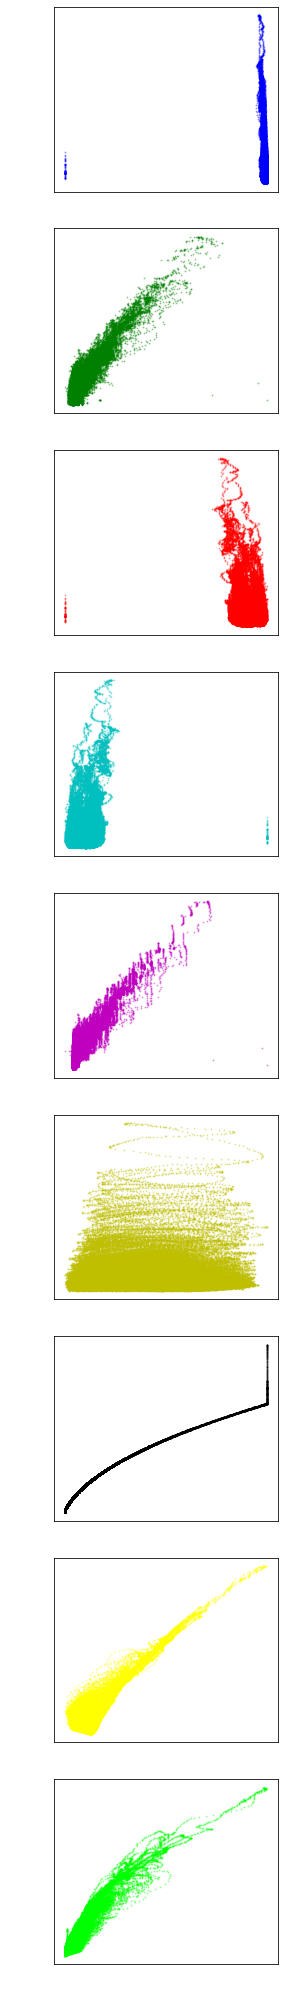

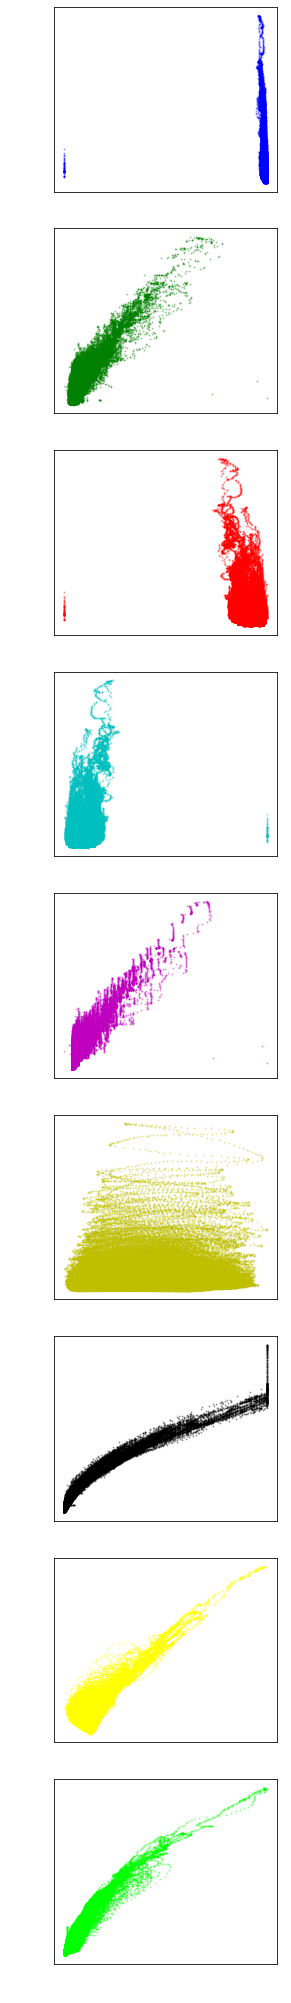

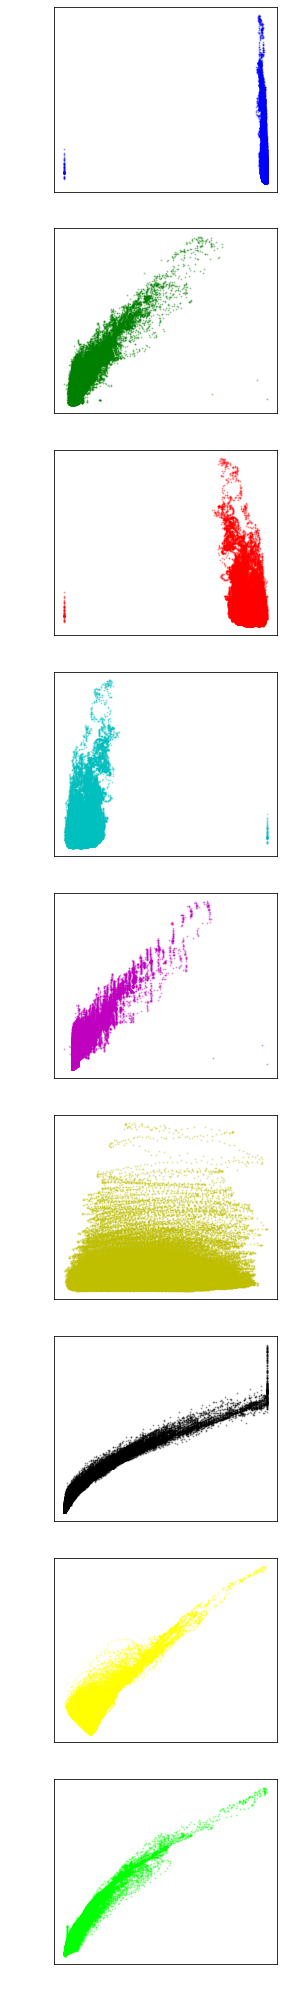

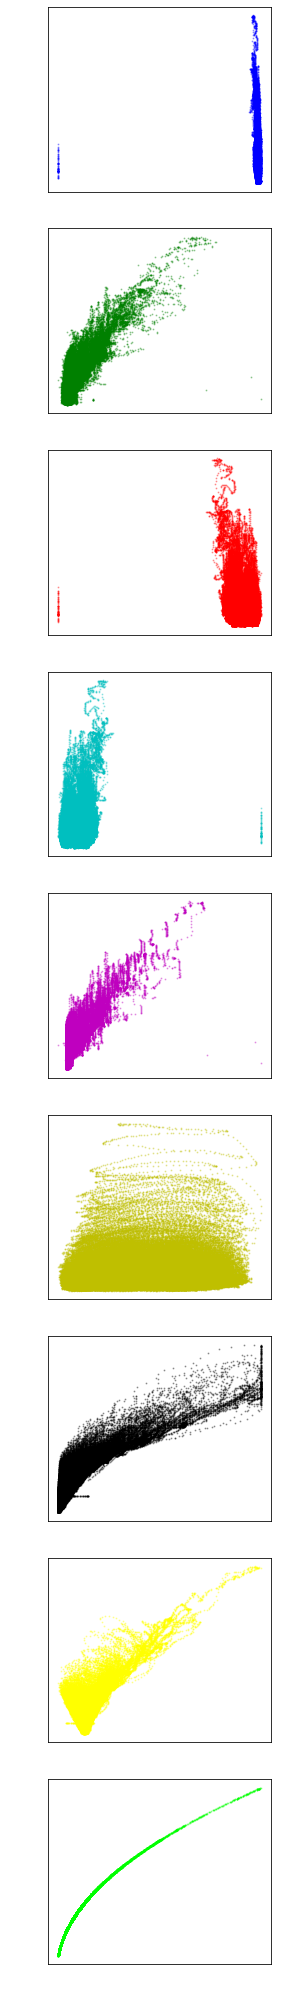

In [22]:
for col in list(submission.columns):
    plotter(list(water_cols.columns), col, df_water)

In [24]:
for i in tqdm(range(len(df_water))):
            for j in range(3, len(df_water.columns)):
                if df_water.iloc[i, j] == 0:
                    if i < 10:
                        df_water.iloc[i, j] = df_water.iloc[:i, j].mean()
                    else: df_water.iloc[i, j] = df_water.iloc[i-10:i, j].mean()

  0%|          | 0/269424 [00:00<?, ?it/s]

C:\Users\smhrd\AppData\Local\Temp\ipykernel_8340\426434122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: df_water.iloc[i, j] = df_water.iloc[i-10:i, j].mean()


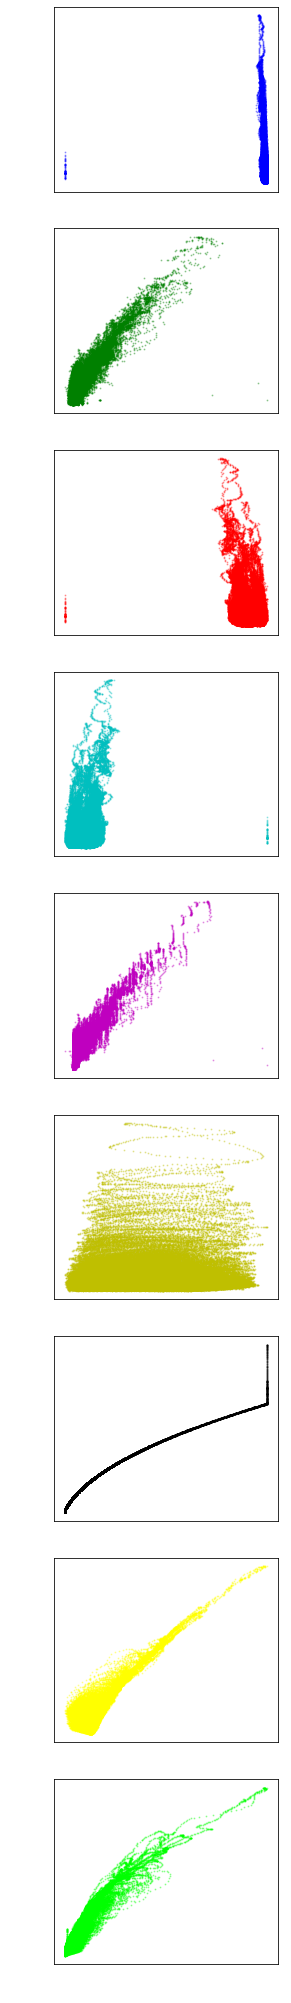

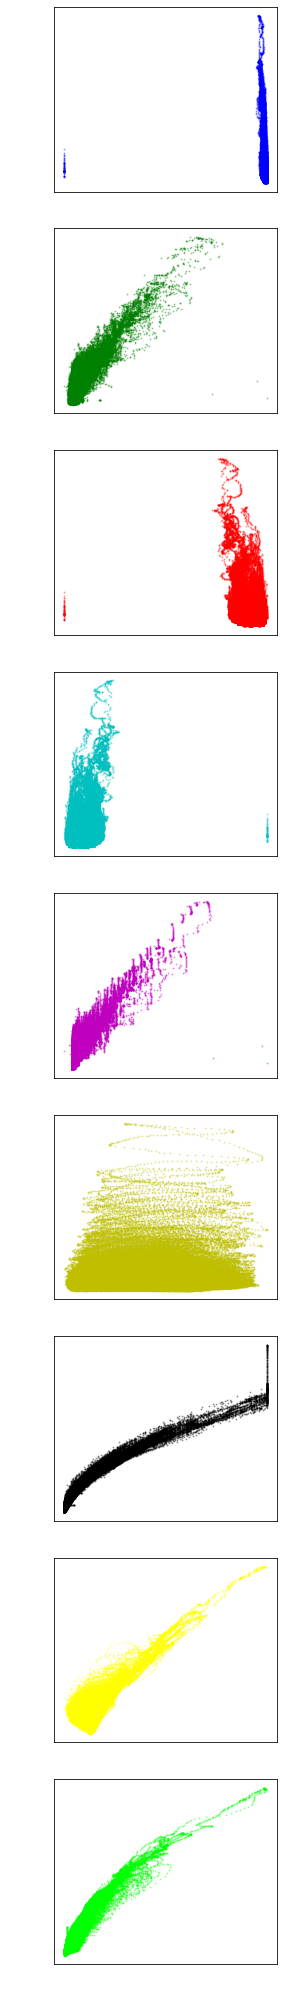

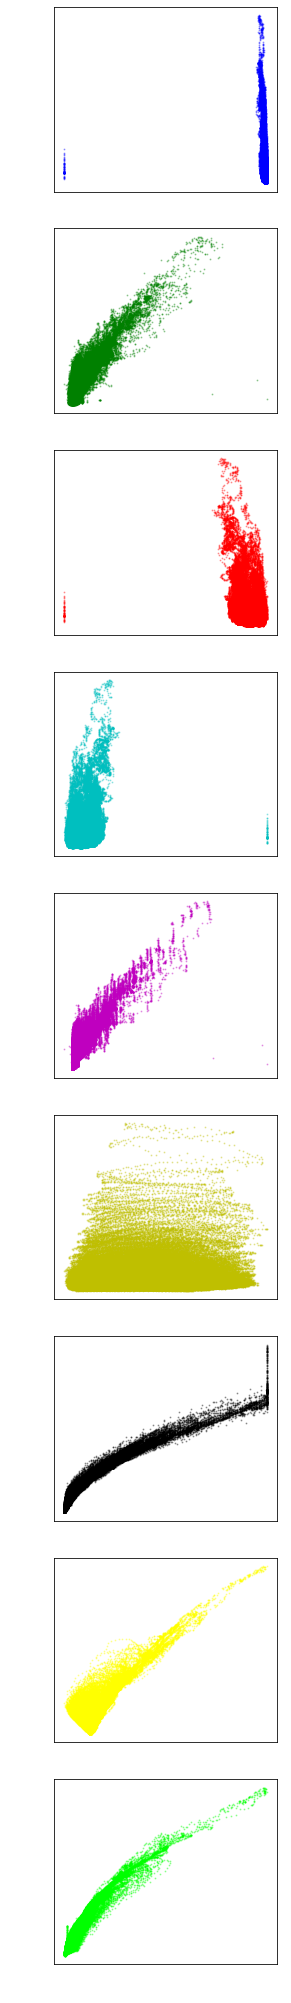

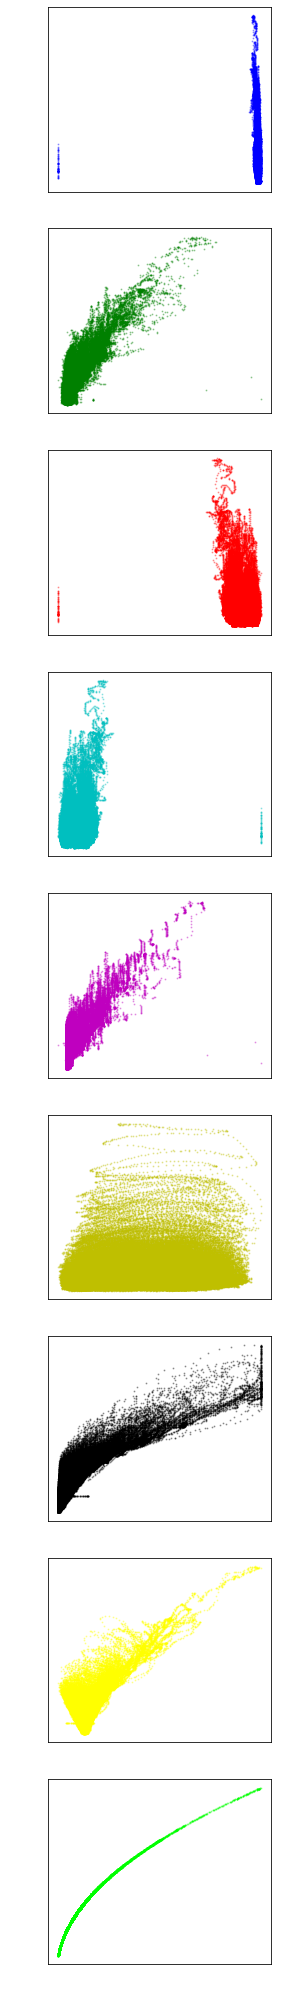

In [25]:
for col in list(submission.columns):
    plotter(list(water_cols.columns), col, df_water)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(sample_data)
scaled_sample = scaler.transform(sample_data)

In [ ]:
scaled_data = sample_data
scaled_data.loc[:, sample.columns] = scaled_sample

In [ ]:
for col in list(submission.columns):
    plotter(list(sample.columns), col, scaled_data)

In [ ]:
for col in list(submission.columns):
    plotter(list(rf_data.columns), col, sample_data)

In [ ]:
linear_col = ['fw_1018662', 'fw_1018683', 'fw_1019630']

In [ ]:
sample_data[linear_col].isnull().sum()

In [ ]:
for col in list(submission.columns):
    plotter(sample_data.columns, col, sample_data)

In [ ]:
list(sample_data.columns)

In [ ]:
sample_data.drop('fw_1018680', axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(12,12))
plt.title('Correlation HeatMap', y = 1.05)
sns.heatmap(sample_data.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)